In [ ]:
# twitter 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../data//applications.csv')
df = df.loc[df['customer_meaning'].notnull()]
df = df.loc[df['reviewer_comments'].notnull()]
df = df.loc[df['status']=='N']

df.to_csv('../data/clean_rejections.csv', index=False)

# eda

In [2]:
val_counts = df['customer_meaning'].value_counts()
ind = val_counts.loc[val_counts==1].index
df = df.loc[df['customer_meaning'].isin(ind)]

val_counts = df['reviewer_comments'].value_counts()
ind = val_counts.loc[val_counts==1].index
df = df.loc[df['reviewer_comments'].isin(ind)]

In [3]:
def make_tweet(df, row_id):
    row = df.iloc[row_id]

    s = np.random.choice(["sir", "ma'am"])
    tweet = (
        f"Californian: Check my sweet idea for a license plate: {row[0]}\n" 
        '\n'
        'DMV: Uh...\n'
        '\n'
        f'C: Get it? {str.capitalize(row[2])}\n'
        '\n'
        f"DMV: I'm sorry, " + s + ", we can't do that.\n"
        '\n'
        'C: Why not?!\n'
        '\n'
        f"DMV: Well, " + s + f" because {str.lower(row[3])}"
    )
    
    return tweet

In [5]:
import re

tweet_len = []
for i in range(len(df)):
    tweet = make_tweet(df, i)
    re.sub('\n', '', tweet)
    tweet_len.append(len(tweet))

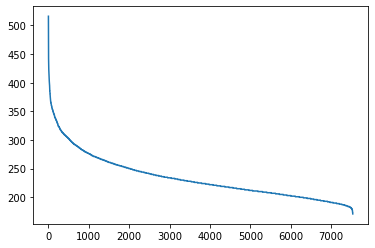

In [6]:
plt.plot(sorted(tweet_len, reverse=True))

In [7]:
sum(i > 280 for i in tweet_len)

887

In [8]:
sum(i <= 280 for i in tweet_len)

6647

In [9]:
print(len(tweet))

285


In [11]:
tweet = make_tweet(df, np.random.randint(0, df.shape[0]))
print(tweet)

Californian: Check my sweet idea for a license plate: MOBYCAT

dmv: Uh...

c: Get it? I have a white cat named "moby". i want to name my white car after her.

dmv: I'm sorry, sir, we can't do that.

c: Why not?!

dmv: Well, sir because moby dick…moby cat.. vagina??


In [5]:
import tweepy
import config
  
# authentication of consumer key and secret 
auth = tweepy.OAuthHandler(config.consumer_key, config.consumer_secret) 
  
# authentication of access token and secret 
auth.set_access_token(config.access_token, config.access_token_secret) 
api = tweepy.API(auth) 
  
# update the status 
api.update_status(status=tweet) 

Status(_api=<tweepy.api.API object at 0x118cbffd0>, _json={'created_at': 'Sun Feb 02 04:45:39 +0000 2020', 'id': 1223829811727982592, 'id_str': '1223829811727982592', 'text': 'Californian: Hey DMV, can I have a license plate that says 13 BLACK?\nDMV: Why?\nC: Because nan, duh.\nDMV: No.\nC: But… https://t.co/rylxHfSMVn', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/rylxHfSMVn', 'expanded_url': 'https://twitter.com/i/web/status/1223829811727982592', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://vanity.placeholder" rel="nofollow">california-vanity</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1223218882560716800, 'id_str': '1223218882560716800', 'name': 'CA_vanity', 'screen_name': 'ca_vanity', 'location': '', 'description': '', 'url